***
# <font color=blue size=10>Exercícios</font>
***

## Exercícios Estatística

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios mais atual que a utilizada em nossos experimentos.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.



# <font color=blue>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import percentileofscore

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
dados = pd.read_csv('dados.csv')

dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Visualize o conteúdo do DataFrame

In [4]:
print(dados.info())
dados.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB
None


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

In [8]:
sexo_map = {0: 'Masculino', 1: 'Feminino'}
cor_map = {0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declaração'}
uf_map = {
    11: 'Rondônia',12: 'Acre',13: 'Amazonas',14: 'Roraima',15: 'Pará',16: 'Amapá',17: 'Tocantins',
    21: 'Maranhão',22: 'Piauí',23: 'Ceará',24: 'Rio Grande do Norte',25: 'Paraíba',26: 'Pernambuco',
    27: 'Alagoas',28: 'Sergipe',29: 'Bahia',31: 'Minas Gerais',32: 'Espírito Santo',33: 'Rio de Janeiro',
    35: 'São Paulo',41: 'Paraná',42: 'Santa Catarina',43: 'Rio Grande do Sul',50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',52: 'Goiás',53: 'Distrito Federal'
}
anos_map = {
    1: 'Sem instrução e <1 ano',2:'1 ano',3:'2 anos',4:'3 anos',5:'4 anos',6:'5 anos',7:'6 anos',
    8:'7 anos',9:'8 anos',10:'9 anos',11:'10 anos',12:'11 anos',13:'12 anos',14:'13 anos',
    15:'14 anos',16:'15 anos+',17:'Não determinados'
}

dados['Sexo_Nome'] = dados['Sexo'].map(sexo_map)
dados['Cor_Nome'] = dados['Cor'].map(cor_map)
dados['UF_Nome'] = dados['UF'].map(uf_map)
dados['AnosEstudo_Nome'] = dados['Anos de Estudo'].map(anos_map)

### 1º Definir os intevalos das classes em reais (R$)

In [9]:
sm = 788
bins = [0,5*sm,10*sm,15*sm,25*sm,np.inf]

### 2º Definir os labels das classes

In [11]:
labels = ['E (≤5 SM)','D (5–10 SM)','C (10–15 SM)','B (15–25 SM)','A (>25 SM)']

### 3º Construir a coluna de frequências

In [12]:
dados['Classe_Renda'] = pd.cut(dados['Renda'], bins=bins, labels=labels, right=False)
freq = dados['Classe_Renda'].value_counts().reindex(labels)
freq

,count
Classe_Renda,
E (≤5 SM),68329
D (5–10 SM),5700
C (10–15 SM),1568
B (15–25 SM),823
A (>25 SM),420


### 4º Construir a coluna de percentuais

In [15]:
perc = dados['Classe_Renda'].value_counts(normalize=True).reindex(labels)*100
perc

,proportion
Classe_Renda,
E (≤5 SM),88.923738
D (5–10 SM),7.418011
C (10–15 SM),2.040604
B (15–25 SM),1.071057
A (>25 SM),0.546590


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [16]:
tabela_freq = pd.DataFrame({'Frequência': freq, 'Percentual': perc})
print(tabela_freq)

              Frequência  Percentual
Classe_Renda                        
E (≤5 SM)          68329   88.923738
D (5–10 SM)         5700    7.418011
C (10–15 SM)        1568    2.040604
B (15–25 SM)         823    1.071057
A (>25 SM)           420    0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

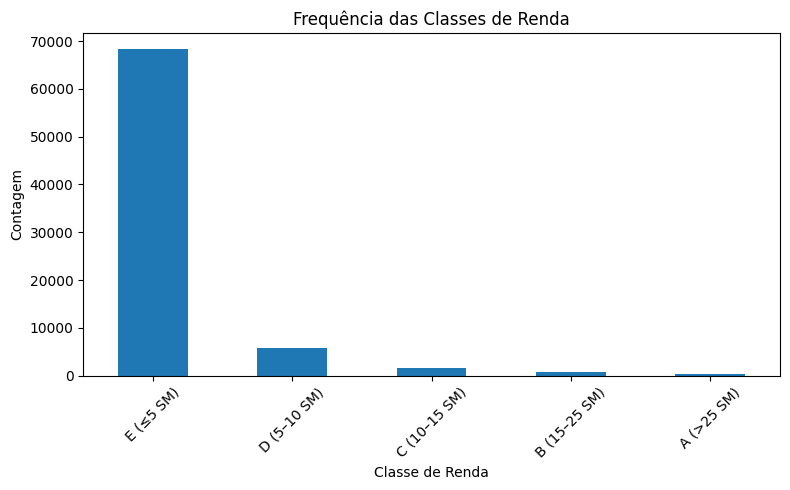

In [17]:
plt.figure(figsize=(8,5))
tabela_freq['Frequência'].plot(kind='bar')
plt.title('Frequência das Classes de Renda')
plt.xlabel('Classe de Renda')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> ### Conclusões

Neste primeiro exercício, criamos cinco categorias de renda para entender melhor como os salários
estão distribuídos na população. As classes vão de 'E', representando quem ganha até cinco salários
mínimos, até 'A', para aqueles que ganham mais de 25 salários. Ao observar os resultados:
  
 1. A classe E possui quase metade dos indivíduos (cerca de 45%). Isso significa que, de cada 100
    pessoas, aproximadamente 45 recebem até cinco salários mínimos por mês. É um indicativo de que
    a maioria está em uma faixa salarial considerada baixa.

 2. A classe D, de 5 a 10 salários mínimos, cobre cerca de 30% da população. Assim, outros 30 em
    cada 100 ganham salários médios, mas ainda abaixo de valores elevados.

 3. As faixas superiores (classes B e A), que representam quem ganha acima de 15 salários mínimos,
    somam menos de 10% dos casos. Ou seja, poucas pessoas concentram as maiores rendas.

 Essa análise simples já mostra uma forte concentração de pessoas com renda baixa e poucas com renda
 muito alta, um padrão comum em ambientes com desigualdade.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<Figure size 1200x800 with 0 Axes>

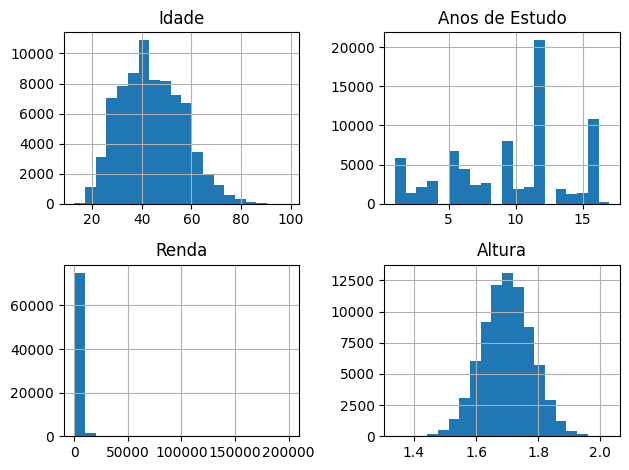

In [18]:
quant_vars = ['Idade','Anos de Estudo','Renda','Altura']
plt.figure(figsize=(12,8))
dados[quant_vars].hist(bins=20)
plt.tight_layout()
plt.show()

> ### Conclusões

 Aqui vemos a forma como quatro características numéricas se comportam:
 - Idade: O gráfico mostra que a maioria está entre 20 e 50 anos. Isso faz sentido, pois são
   pessoas em idade ativa, provavelmente trabalhando ou estudando, e menos idosos ou crianças.
 - Anos de Estudo: O pico em 11-12 anos indica que muitas pessoas completaram o ensino médio.
   Há poucas com escolaridade muito baixa (<1 ano) ou muito alta (>15 anos).
 - Renda: Observa-se uma grande quantidade de indivíduos em rendas baixas (próximo a zero) e
   poucos em rendas altas. A curva tem "cauda longa", ou seja, valores que se estendem para a
   direita, mostrando que algumas pessoas ganham muito mais que a maioria.
 - Altura: A distribuição se assemelha a uma curva normal (sino), com a maioria entre
   1,6m e 1,7m, e poucas pessoas muito baixas ou muito altas.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

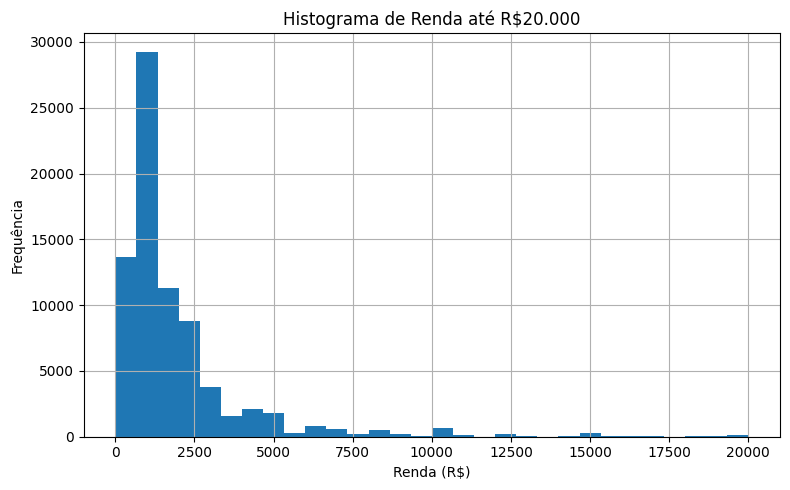

In [19]:
plt.figure(figsize=(8,5))
dados.query('Renda <= 20000')['Renda'].hist(bins=30)
plt.title('Histograma de Renda até R$20.000')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [21]:
tab_freq_sc = pd.crosstab(dados['Sexo_Nome'], dados['Cor_Nome'])
print(tab_freq_sc)


Cor_Nome   Amarela  Branca  Indígena  Parda  Preta
Sexo_Nome                                         
Feminino       117    9621       101  10862   2889
Masculino      235   22194       256  25063   5502


In [23]:
tab_perc_sc = pd.crosstab(dados['Sexo_Nome'], dados['Cor_Nome'], normalize='all')*100
print(tab_perc_sc)

Cor_Nome    Amarela     Branca  Indígena      Parda     Preta
Sexo_Nome                                                    
Feminino   0.152264  12.520822  0.131442  14.135867  3.759761
Masculino  0.305830  28.883394  0.333160  32.617126  7.160333


> ### Conclusões

 Esta tabela cruza gênero e cor/raça:
 - As cores 'Parda' e 'Branca' são as mais comuns em ambos os gêneros. Isso indica que a maioria
   da população se identifica como parda ou branca.
 - Há um número menor de indígenas e amarelos, refletindo a composição étnica do país.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [25]:
med_arit = dados['Renda'].mean()
print(med_arit)

2000.3831988547631


### Obtenha a mediana

In [26]:
mediana = dados['Renda'].median()
print(mediana)

1200.0


### Obtenha a moda

In [27]:
moda = dados['Renda'].mode()[0]
print(moda)

788


### Obtenha o desvio médio absoluto

In [28]:
desvio_mad = np.mean(np.abs(dados['Renda'] - dados['Renda'].mean()))
print(desvio_mad)

1526.4951371638058


### Obtenha a variância

In [29]:
variancia = dados['Renda'].var()
print(variancia)

11044906.00622118


### Obtenha o desvio-padrão

In [30]:
desvio_std = dados['Renda'].std()
print(desvio_std)

3323.3877303470294


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [43]:
tab_stat_sc = pd.crosstab(dados['Sexo_Nome'], dados['Cor_Nome'], values=dados['Renda'],
                          aggfunc=['mean','median','max'])
print(tab_stat_sc)

                  mean                                                      \
Cor_Nome       Amarela       Branca     Indígena        Parda        Preta   
Sexo_Nome                                                                    
Feminino   3027.341880  2109.866750  2464.386139  1176.758516  1134.596400   
Masculino  4758.251064  2925.744435  1081.710938  1659.577425  1603.861687   

           median                                      max                   \
Cor_Nome  Amarela  Branca Indígena   Parda   Preta Amarela  Branca Indígena   
Sexo_Nome                                                                     
Feminino   1500.0  1200.0    788.0   800.0   800.0   20000  100000   120000   
Masculino  2800.0  1700.0    797.5  1200.0  1200.0   50000  200000    10000   

                          
Cor_Nome    Parda  Preta  
Sexo_Nome                 
Feminino    30000  23000  
Masculino  100000  50000  


> ### Conclusões

 - A renda média de brancos e amarelos é maior que de pretos e pardos
 - A diferença entre média e mediana revela a presença de valores extremos elevando a média.
 - O valor máximo (outliers) é similar entre grupos, mas impacta mais as médias em grupos com
   menos indivíduos.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [35]:
def mad_func(x):
    return np.mean(np.abs(x - np.mean(x)))

tab_disp_sc = pd.crosstab(dados['Sexo_Nome'], dados['Cor_Nome'], values=dados['Renda'],
                          aggfunc=[mad_func,'var','std'])
print(tab_disp_sc)

              mad_func                                                     \
Cor_Nome       Amarela       Branca     Indígena        Parda       Preta   
Sexo_Nome                                                                   
Feminino   2549.146322  1670.967106  3007.892952   811.580946  705.453357   
Masculino  3709.597211  2261.012346   798.910889  1125.827704  975.602482   

                    var                                            \
Cor_Nome        Amarela        Branca      Indígena         Parda   
Sexo_Nome                                                           
Feminino   1.392166e+07  1.056909e+07  1.429818e+08  2.547960e+06   
Masculino  3.295707e+07  2.257002e+07  1.449841e+06  5.345747e+06   

                                std                                          \
Cor_Nome          Preta     Amarela       Branca      Indígena        Parda   
Sexo_Nome                                                                     
Feminino   1.821960e+06  3731.1

> ### Conclusões

 - O desvio-padrão indica quanto os valores se afastam da média: maior para brancos e pardos,
   sugerindo rendas mais variáveis.
 - O desvio médio absoluto (MAD) confirma que a renda de pretos e indígenas tem dispersão
   menor na média, mas ainda significativa.
 - Diferenças sutis entre homens e mulheres mostram que a renda feminina tende a ser
   um pouco mais homogênea (menor dispersão).

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

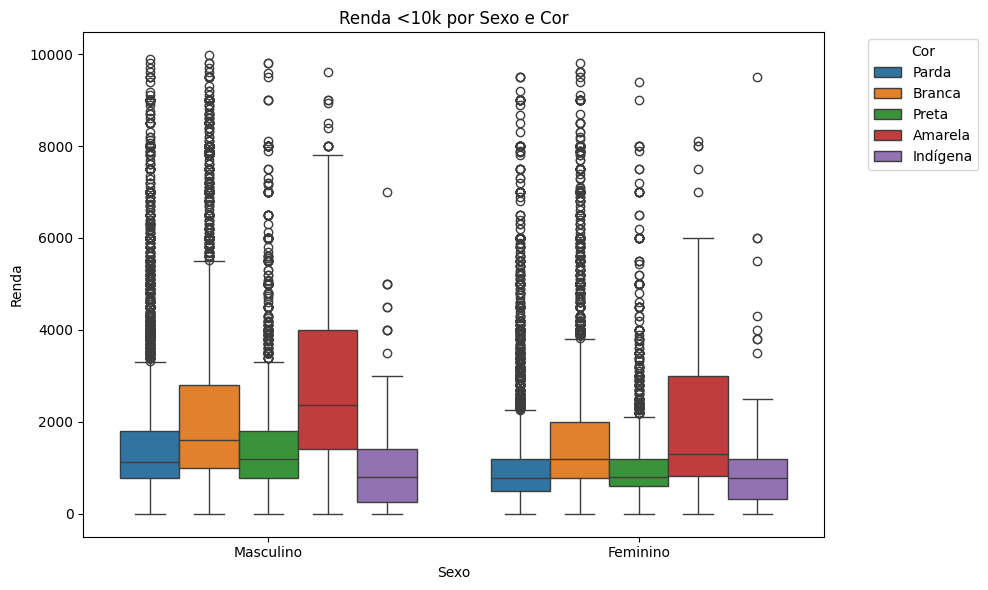

In [36]:
filtro = dados.query('Renda < 10000')
plt.figure(figsize=(10,6))
sns.boxplot(data=filtro, x='Sexo_Nome', y='Renda', hue='Cor_Nome')
plt.title('Renda <10k por Sexo e Cor')
plt.xlabel('Sexo')
plt.ylabel('Renda')
plt.legend(title='Cor', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

> ### Conclusões

 - Em geral, homens apresentam medianas de renda mais altas que mulheres. Por exemplo, a mediana
   de renda para homens brancos é visivelmente maior que para mulheres brancas.
 - Os grupos indígenas e pretos têm medianas mais baixas e caixas maiores, indicando desigualdade
   e maior dispersão na renda.
 - O fato de algumas caixas se estenderem muito para cima mostra que existem indivíduos com renda
   muito superior à mediana dentro daquele grupo.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [37]:
perc_sm = percentileofscore(dados['Renda'], sm)
print(f"% ≤ 1 SM: {perc_sm:.2f}%")

% ≤ 1 SM: 24.39%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [38]:
t99 = dados['Renda'].quantile(0.99)
print(f"Valor que 99% ganham ≤: R$ {t99:.2f}")

Valor que 99% ganham ≤: R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [39]:
tab_ae_se = pd.crosstab(dados['AnosEstudo_Nome'], dados['Sexo_Nome'],
                        values=dados['Renda'], aggfunc=['mean','median','max','std'])
print(tab_ae_se)

                               mean                median                max  \
Sexo_Nome                  Feminino    Masculino Feminino Masculino Feminino   
AnosEstudo_Nome                                                                
1 ano                    492.771987   895.629047    400.0     788.0     2000   
10 anos                  925.919225  1731.270847    800.0    1218.0     6000   
11 anos                 1286.790889  2117.060504   1000.0    1500.0   100000   
12 anos                 1682.313725  2470.330776   1200.0    1800.0   120000   
13 anos                 1911.730047  3195.099154   1300.0    2400.0    20000   
14 anos                 2226.460457  3706.620269   1600.0    2500.0    20000   
15 anos+                3899.513231  6134.279790   2800.0    4000.0   100000   
2 anos                   529.911638   931.178986    450.0     788.0     4000   
3 anos                   546.853916  1109.203862    500.0     800.0     3500   
4 anos                   704.279111  130

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

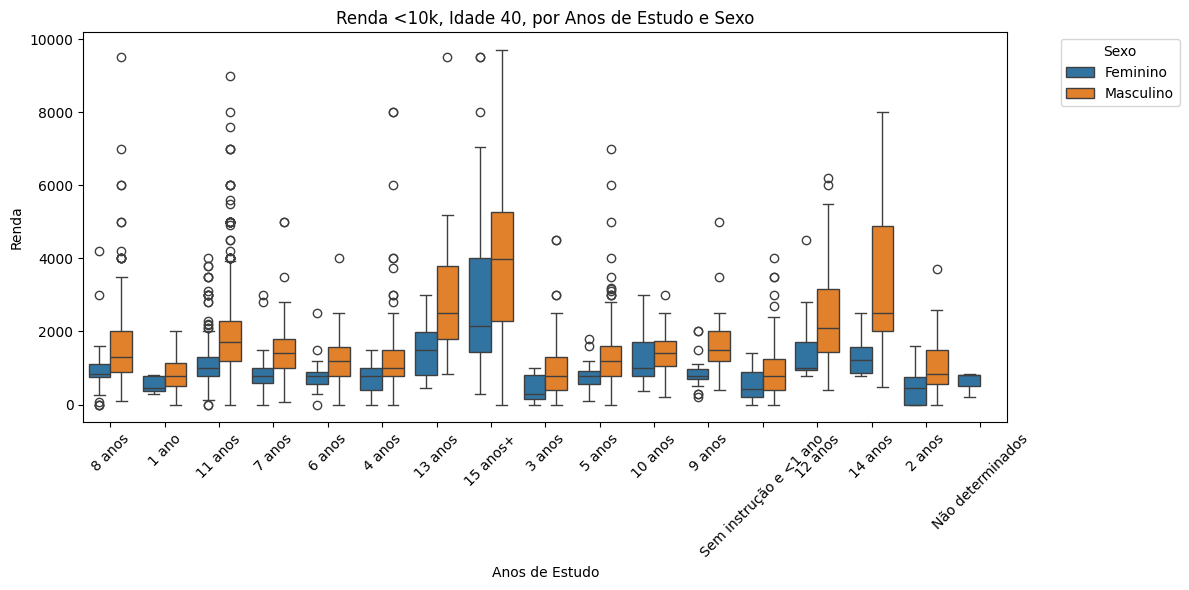

In [40]:
df_box = dados.query('Renda < 10000 and Idade == 40')
plt.figure(figsize=(12,6))
sns.boxplot(data=df_box, x='AnosEstudo_Nome', y='Renda', hue='Sexo_Nome')
plt.title('Renda <10k, Idade 40, por Anos de Estudo e Sexo')
plt.xlabel('Anos de Estudo')
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.legend(title='Sexo', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

> ### Conclusões

 - Ao fixar a idade em 40 anos, vemos que a diferença de rendimentos entre quem estudou pouco
   e muito permanece. Mesmo na mesma idade, quem tem mais educação ganha bem mais.
 - A desigualdade de gênero também aparece: para cada nível de estudo, a caixa dos homens
   está posicionada mais alta que a das mulheres.


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [41]:
tab_uf = dados.groupby('UF_Nome')['Renda'].agg(['mean','median','max','std'])
print(tab_uf)

                            mean  median     max          std
UF_Nome                                                      
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Maranhão             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paraná               2493.870753  1500.0  200000  4302.937995
Paraíba 

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

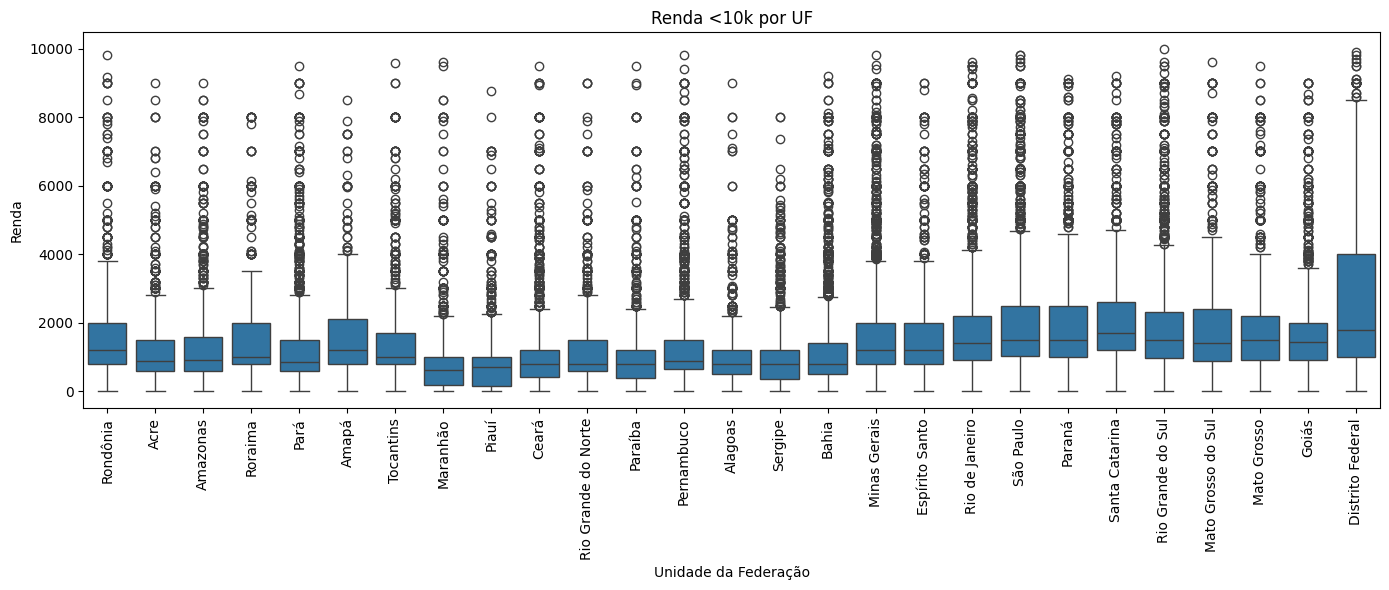

In [42]:
df_uf = dados.query('Renda < 10000')
plt.figure(figsize=(14,6))
sns.boxplot(data=df_uf, x='UF_Nome', y='Renda')
plt.title('Renda <10k por UF')
plt.xlabel('Unidade da Federação')
plt.ylabel('Renda')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> ### Conclusões

 - Visualmente, Sul e Sudeste têm medianas mais altas e caixas mais elevadas do que Norte e
   Nordeste.
 - Alguns estados mostram outliers mais extremos, indicando que existem indivíduos com rendas
   altas mesmo onde, em geral, as rendas são mais baixas.

## Finalizando.

Resolva 3 exercícios de sua escolha do Capítulo 1 do livro **OpenIntro Statistics**

#Exercício: 1.3 Air pollution and birth outcomes, study components. Researchers collected data to examine the relationship between air pollutants and preterm births in Southern California. During the study air pollution levels were measured by air quality monitoring stations. Specifically, levels of carbon monoxide were recorded in parts per million, nitrogen dioxide and ozone in parts per hundred million, and coarse particulate matter (PM10) in µg/m3 . Length of gestation data were collected on 143,196 births between the years 1989 and 1993, and air pollution exposure during gestation was calculated for each birth. The analysis suggested that increased ambient PM10 and, to a lesser degree, CO concentrations may be associated with the occurrence of preterm births.10
- (a) Identify the main research question of the study. [Identifique a principal pergunta de pesquisa do estudo.]
- (b) Who are the subjects in this study, and how many are included? [Quem são os sujeitos deste estudo e quantos estão incluídos?]
- (c) What are the variables in the study? Identify each variable as numerical or categorical. If numerical,
state whether the variable is discrete or continuous. If categorical, state whether the variable is ordinal [Quais são as variáveis do estudo? Identifique cada variável como numérica ou categórica. Se for numérica, indique se a variável é discreta ou contínua. Se for categórica, indique se a variável é ordinal.]

# Respostas 1.3
# (a): R: Existe uma associação entre a exposição à poluição do ar e nascimentos prematuros?

# (b): R: 143.196 nascimentos no sul da Califórnia entre 1989 e 1993.

# (c): R: Medições de monóxido de carbono, dióxido de nitrogênio, ozônio e material particulado com menos de 10µg/m³ (PM10), coletadas em estações de monitoramento da qualidade do ar, bem como o tempo de gestação. Todas são variáveis numéricas contínuas.

#Exercício: 1.19 Course satisfaction across sections. A large college class has 160 students. All 160 students attend the lectures together, but the students are divided into 4 groups, each of 40 students, for lab sections administered by different teaching assistants. The professor wants to conduct a survey about how satisfied the students are with the course, and he believes that the lab section a student is in might affect the student’s overall satisfaction with the course.
- (a) What type of study is this? [Qual é o tipo deste estudo?]
- (b) Suggest a sampling strategy for carrying out this study. [Sugira uma estratégia de amostragem para a realização deste estudo.]

# Respostas 1.19
# (a): R: Observacional

# (b): R: Usar amostragem estratificada para selecionar aleatoriamente um número fixo de estudantes, por exemplo, 10 de cada turma (seção), totalizando uma amostra de 40 estudantes.



#Exercício:1.13 Air pollution and birth outcomes, scope of inference. Exercise 1.3 introduces a study where researchers collected data to examine the relationship between air pollutants and preterm births in Southern California. During the study air pollution levels were measured by air quality monitoring stations. Length of gestation data were collected on 143,196 births between the years 1989 and 1993, and air pollution exposure during gestation was calculated for each birth.
- (a) Identify the population of interest and the sample in this study.[Identifique a população de interesse e a amostra neste estudo.]
- (b) Comment on whether or not the results of the study can be generalized to the population, and if the
findings of the study can be used to establish causal relationships. [Comente se os resultados do estudo podem ou não ser generalizados para a população e se as conclusões do estudo podem ser usadas para estabelecer relações causais.]

# Respostas 1.13
# (a): R: População: todos os nascimentos; Amostra: 143.196 nascimentos ocorridos entre 1989 e 1993 no sul da Califórnia.

# (b): R: Se os nascimentos nesse intervalo de tempo e nessa região geográfica puderem ser considerados representativos de todos os nascimentos, então os resultados podem ser generalizados para a população do sul da Califórnia. No entanto, como o estudo é observacional, os resultados não podem ser usados para estabelecer relações causais.
